<a href="https://colab.research.google.com/github/amnayottama/Detection-Different-in-Similar-image/blob/main/Test_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import cv2 as cv
import imutils

from skimage.metrics import structural_similarity as compare_ssim
from google.colab.patches import cv2_imshow

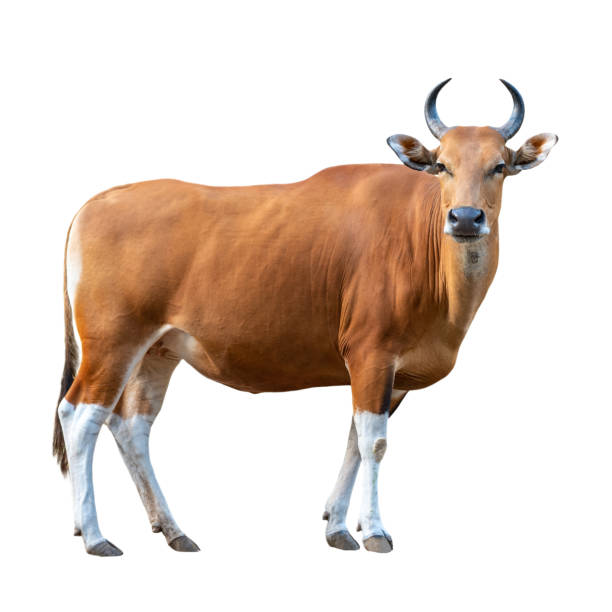

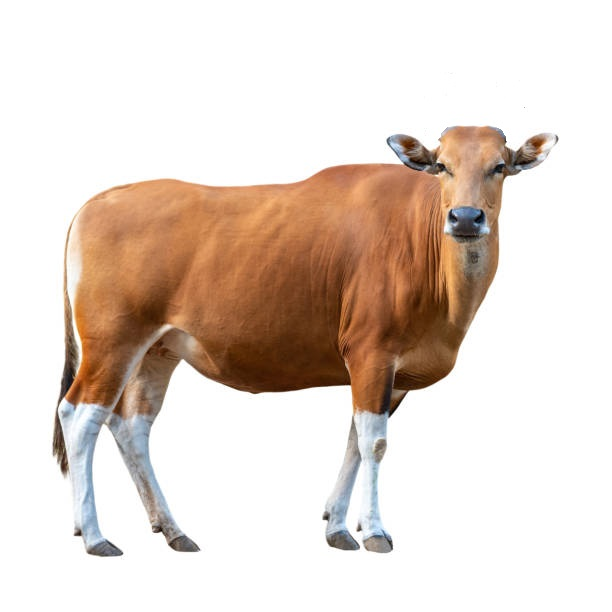

In [9]:
img1 = cv.imread('/content/drive/MyDrive/Similar Cat/sapi1.jpg')
img2 = cv.imread('/content/drive/MyDrive/Similar Cat/sapi1removehorn.jpg')
cv2_imshow(img1)
cv2_imshow(img2)

SSIM: 0.9925747033810441


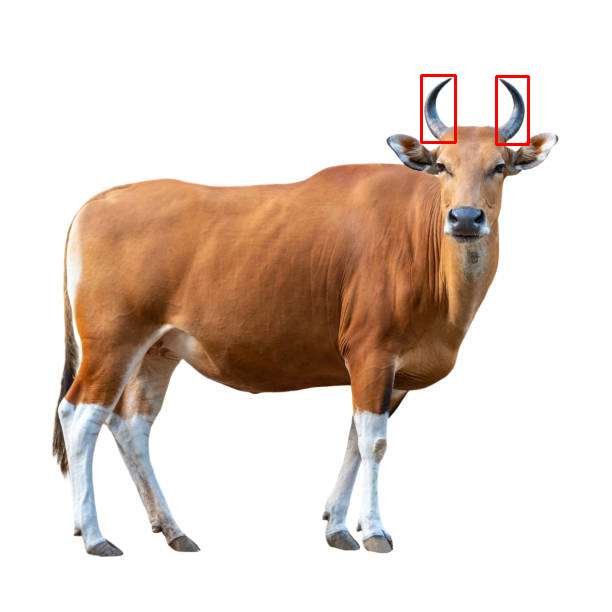

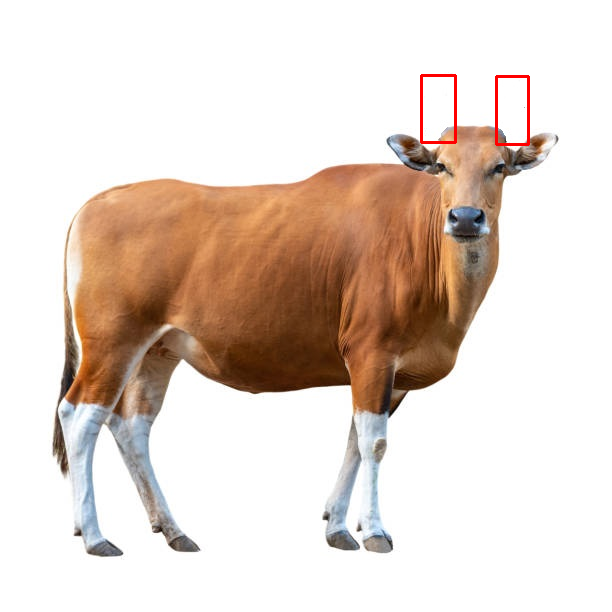

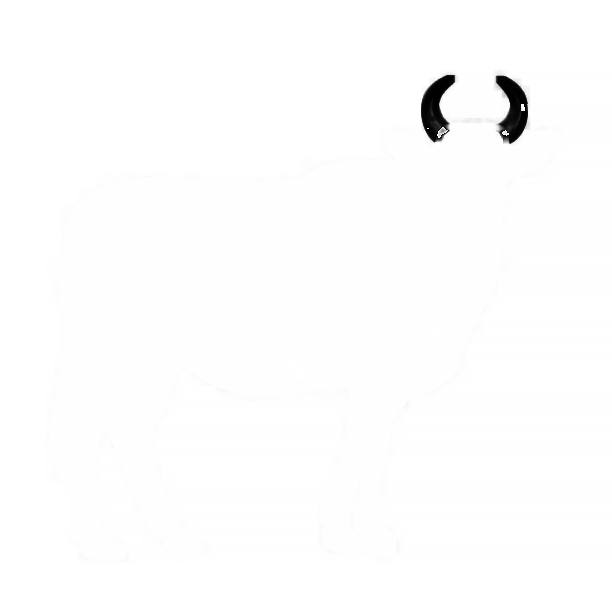

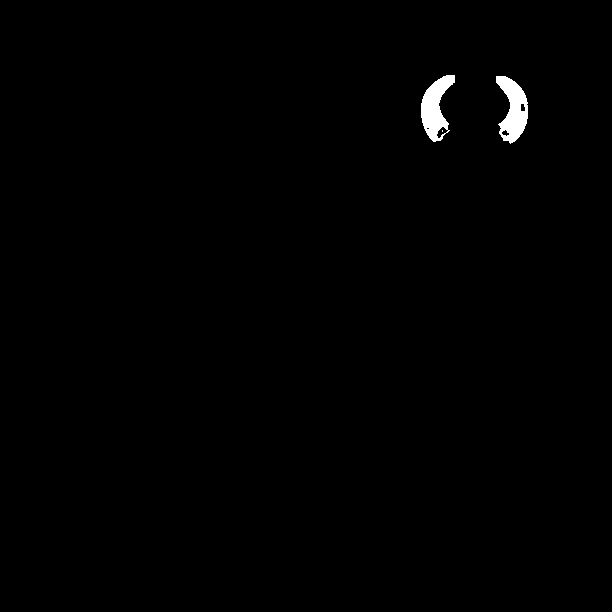

In [10]:
# convert the images to grayscale
grayA = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
grayB = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv.threshold(diff, 0, 255,
	cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
cnts = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL,
	cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv.boundingRect(c)
	cv.rectangle(img1, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv.rectangle(img2, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
# show the output images
cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(diff)
cv2_imshow(thresh)